In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [81]:
# Function to perform Monte Carlo simulation for stock price movement
def monte_carlo_simulation(initial_price, mean, std_dev, time_horizon, num_simulations):
    dt = 1  # Time interval (1 year)
    num_steps = int(time_horizon / dt)  # Number of time steps

    # Generate random numbers for each simulation and each time step
    random_numbers = np.random.randn(num_simulations, num_steps)

    # Calculate stock price trajectories for each simulation
    stock_prices = np.zeros((num_simulations, num_steps+1))
    stock_prices[:, 0] = initial_price  # Set initial stock price

    for i in range(1, num_steps+1):
        # Calculate drift term
        drift_term = (mean - 0.5 * std_dev**2) * dt * i

        # Calculate volatility term
        volatility_term = std_dev * np.sqrt(dt) * random_numbers[:, i-1]

        # Update stock prices using GBM equation
        stock_prices[:, i] = stock_prices[:, i-1] * np.exp(drift_term + volatility_term)

    return stock_prices

In [82]:
# Parameters for simulation
initial_price = 100  # Initial stock price
mean_range = np.linspace(0.01, 0.1, 10)  # Mean return range (from 1% to 10% per year)
std_dev_range = np.linspace(0.05, 0.3, 10)  # Volatility range (from 5% to 30% per year)
time_horizon = 3  # Time horizon (5 years)
num_simulations = 10  # Number of simulations

In [83]:
# Initialize arrays to store skewness and kurtosis values
skewness_values = np.zeros((len(mean_range), len(std_dev_range)))
kurtosis_values = np.zeros((len(mean_range), len(std_dev_range)))


In [84]:
# Perform Monte Carlo simulation for each combination of mean and standard deviation
for i, mean in enumerate(mean_range):
    for j, std_dev in enumerate(std_dev_range):
        simulated_prices = monte_carlo_simulation(initial_price, mean, std_dev, time_horizon, num_simulations)
        final_prices = simulated_prices[:, -1]
        skewness_values[i, j] = skew(final_prices)
        kurtosis_values[i, j] = kurtosis(final_prices, fisher=False)


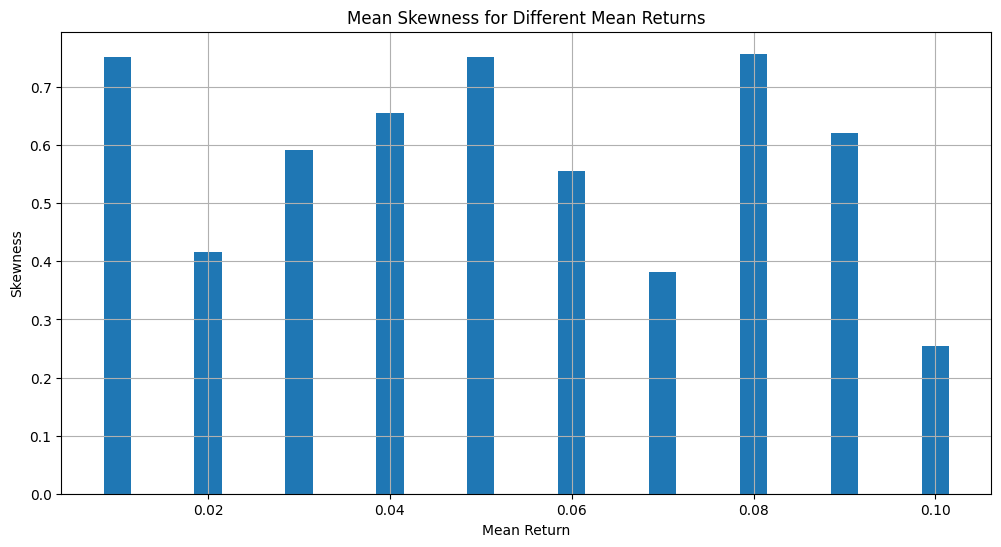

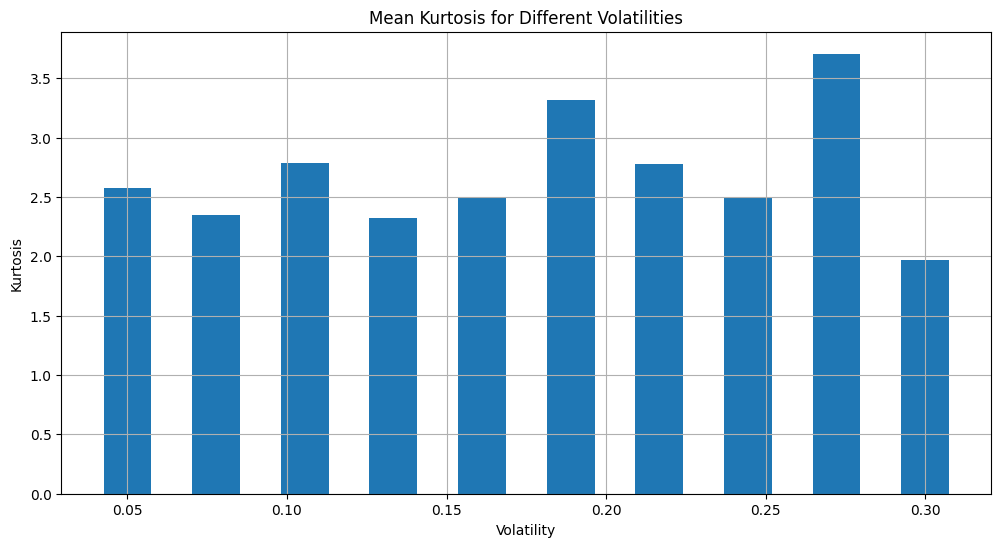

Skewness of simulated stock prices: [[ 1.96718358  0.33229292 -0.15007919 -0.10315079  0.56417326  1.81588013
   1.47721566  0.12556986  0.76043065  0.72705367]
 [ 0.20641591  0.62134824  0.6399692   0.06139162  0.2886466   0.65188915
   0.0781571   0.60968222  1.0624161  -0.05073999]
 [ 0.79701523  0.54417086  0.10844498  0.54323862  0.41946851  1.0618139
   0.65664648  1.04666462  0.67519538  0.05744271]
 [-0.21369997  0.38734155  0.6106711   0.90355413  0.78718317 -0.19116948
   1.09952068  0.55759102  1.82038902  0.79820516]
 [ 0.01279575 -0.30720604  1.17686762  0.63466365 -0.17731837  2.10524754
   1.98863498  0.95407471  0.48315182  0.64472888]
 [-0.74556365  0.21348706  0.68474115  0.38403645  1.24099054  0.14931515
   0.00785662  1.28863954  2.17256653  0.1632872 ]
 [ 0.08743977  0.47628266  1.09764323  0.52096839  0.37021205 -0.4840124
   0.59566227  0.63875651  0.0273606   0.49111055]
 [-0.77044019  0.49376286  1.40607303  1.38991232  0.75676013  1.31307822
   0.96371248  0.

In [85]:
# Plot skewness as a bar graph
plt.figure(figsize=(12, 6))
plt.bar(mean_range, skewness_values.mean(axis=1), width=0.003)
plt.title('Mean Skewness for Different Mean Returns')
plt.xlabel('Mean Return')
plt.ylabel('Skewness')
plt.grid(True)
plt.show()

# Plot kurtosis as a bar graph
plt.figure(figsize=(12, 6))
plt.bar(std_dev_range, kurtosis_values.mean(axis=0), width=0.015)
plt.title('Mean Kurtosis for Different Volatilities')
plt.xlabel('Volatility')
plt.ylabel('Kurtosis')
plt.grid(True)
plt.show()

print(f'Skewness of simulated stock prices: {skewness_values}')
print(f'Kurtosis of simulated stock prices: {kurtosis_values}')

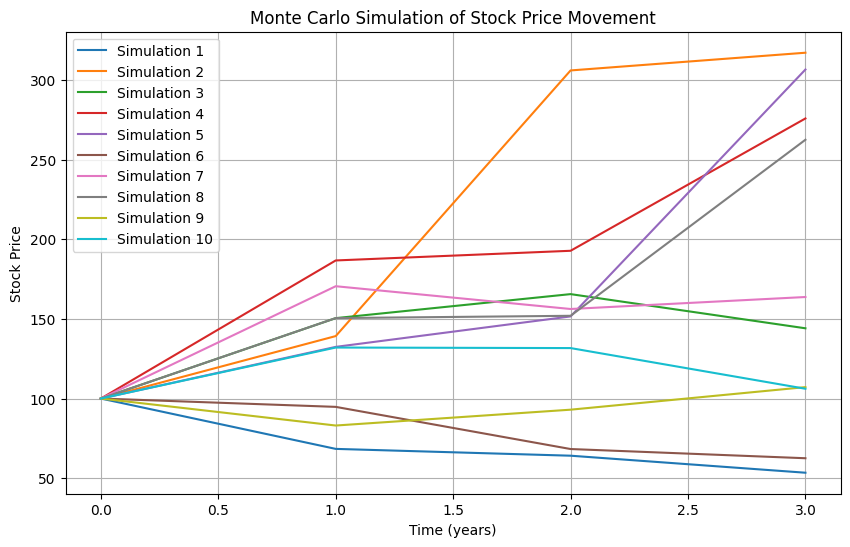

In [86]:
# Plot stock price trajectories
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(np.linspace(0, time_horizon, simulated_prices.shape[1]), simulated_prices[i], label=f'Simulation {i+1}')
plt.title('Monte Carlo Simulation of Stock Price Movement')
plt.xlabel('Time (years)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()